In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.datasets import make_classification

In [541]:
df = pd.read_sas('nsch_2022e_topical.sas7bdat')

In [542]:
df = df[df['GRADES'].isin([1, 2, 3, 4, 5])]
df = df[df['SC_AGE_YEARS'] >= 6]

In [543]:
df['race'] = np.nan

df.loc[(df['SC_HISPANIC_R'] == 2) & (df['SC_RACE_R'] == 1), 'race'] = 2
df.loc[(df['SC_HISPANIC_R'] == 2) & (df['SC_RACE_R'] == 2), 'race'] = 3
df.loc[(df['SC_HISPANIC_R'] == 2) & (df['SC_RACE_R'].isin([3, 4, 5, 6, 7])), 'race'] = 4
df.loc[df['SC_HISPANIC_R'] == 1, 'race'] = 1
df.loc[(df['SC_HISPANIC_R'] == '.M') | (df['SC_RACE_R'] == '.M'), 'race'] = np.nan

In [544]:
df['ADHD'] = np.nan
    
df.loc[df['K2Q31A'] == 2, 'ADHD'] = 1
df.loc[(df['K2Q31A'] == 1) & (df['K2Q31B'] == 2), 'ADHD'] = 2
df.loc[(df['K2Q31A'] == 1) & (df['K2Q31B'] == 1), 'ADHD'] = 3
df.loc[(df['K2Q31A'] == '.M') | (df['K2Q31B'] == '.M'), 'ADHD'] = np.nan

In [545]:
df['GRADES'] = df['GRADES']
df.loc[df['GRADES'] == 5, 'GRADES'] = 4

In [546]:
df['school_engage'] = 2

df.loc[(df['K7Q82_R'] == 1) & (df['K7Q83_R'] == 1), 'school_engage'] = 1
df.loc[(df['K7Q82_R'].isin([3, 4])) | (df['K7Q83_R'].isin([3, 4])), 'school_engage'] = 3
df.loc[(df['K7Q82_R'].isna()) & (df['K7Q83_R'].isna()), 'school_engage'] = np.nan


In [547]:
df['flourish_count'] = 0

df.loc[df['K7Q84_R'].isin([1, 2]), 'flourish_count'] += 1
df.loc[df['K7Q85_R'].isin([1, 2]), 'flourish_count'] += 1
df.loc[df['K6Q71_R'].isin([1, 2]), 'flourish_count'] += 1
df.loc[(df['K7Q84_R'].isna()) & (df['K7Q85_R'].isna()) & (df['K6Q71_R'].isna()), 'flourish_count'] = np.nan

df['flourish'] = np.nan

df.loc[df['flourish_count'].isin([0, 1]), 'flourish'] = 1
df.loc[df['flourish_count'] == 2, 'flourish'] = 2
df.loc[df['flourish_count'] == 3, 'flourish'] = 3
df.loc[(df['K7Q84_R'].isna()) & (df['K7Q85_R'].isna()) & (df['K6Q71_R'].isna()), 'flourish'] = np.nan

In [548]:
df['parent_care'] = np.nan

df.loc[df['K8Q31'] == 1, 'parent_care'] = 1
df.loc[df['K8Q31'] == 2, 'parent_care'] = 2
df.loc[df['K8Q31'] == 3, 'parent_care'] = 3
df.loc[df['K8Q31'].isin([4, 5]), 'parent_care'] = 4
df.loc[df['K8Q31'].isna(), 'parent_care'] = np.nan


In [549]:
df['adhd_med'] = np.nan

df.loc[(df['K2Q31A'] == 2) | ((df['K2Q31A'] == 1) & (df['K2Q31B'] == 2)), 'ADHDMed_22'] = 3
df.loc[(df['K2Q31A'] == '.M') | (df['K2Q31B'] == '.M') | (df['K2Q31D'] == '.M'), 'ADHDMed_22'] = np.nan
df.loc[df['K2Q31D'] == 2, 'ADHDMed_22'] = 2
df.loc[df['K2Q31D'] == 1, 'ADHDMed_22'] = 1

In [550]:
df['adhd_behtreat'] = np.nan

df.loc[(df['K2Q31A'] == 2) | ((df['K2Q31A'] == 1) & (df['K2Q31B'] == 2)), 'adhd_behtreat'] = 3
df.loc[(df['K2Q31A'] == '.M') | (df['K2Q31B'] == '.M') | (df['ADDTREAT'] == '.M'), 'adhd_behtreat'] = np.nan
df.loc[df['ADDTREAT'] == 1, 'adhd_behtreat'] = 1
df.loc[df['ADDTREAT'] == 2, 'adhd_behtreat'] = 2

In [551]:
df.dropna(subset=['ADHD'], inplace=True)
df.dropna(subset=['SCREENTIME'], inplace=True)
df.dropna(subset=['SC_SEX'], inplace=True)
df.dropna(subset=['flourish'], inplace=True)

In [552]:
def transform_adhd(value):
    if value >= 3:
        return 1
    else:
        return 0

df['ADHD'] = df['ADHD'].apply(transform_adhd)

In [553]:
cols2 = {
    'SC_SEX': 'sex',
    'GRADES': 'grades',
    'BULLIED_R': 'bullied',
    'ADHD': 'adhd'}

In [554]:
df.rename(columns=cols2, inplace=True)

In [555]:
df2 = df[['race','grades', 'school_engage', 'flourish', 'parent_care','adhd']]

In [556]:
df2.head()

,race,grades,school_engage,flourish,parent_care,adhd
1,1.0,2.0,1.0,1.0,3.0,0
3,2.0,1.0,1.0,3.0,1.0,0
4,1.0,1.0,1.0,3.0,1.0,0
7,4.0,2.0,2.0,3.0,1.0,0
9,1.0,2.0,2.0,3.0,1.0,0


In [557]:
sns

<module 'seaborn' from 'C:\\Users\\dell\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

In [558]:
df2 = df2.dropna(axis=0)


In [559]:
df2 = df2.astype(float)


In [560]:
df_black = df2[df2['race'] == 3]
df_white = df2[df2['race'] == 2]
df_hispanic = df2[df2['race'] == 1]

In [561]:
df_badblack = df_black[['grades']]

In [562]:
print("#Black:", df_black.shape)
print('# Hispanic:', df_hispanic.shape)
print('# White:', df_white.shape)
print('# Total:', df2.shape)


#Black: (1931, 6)
# Hispanic: (4497, 6)
# White: (18339, 6)
# Total: (28716, 6)


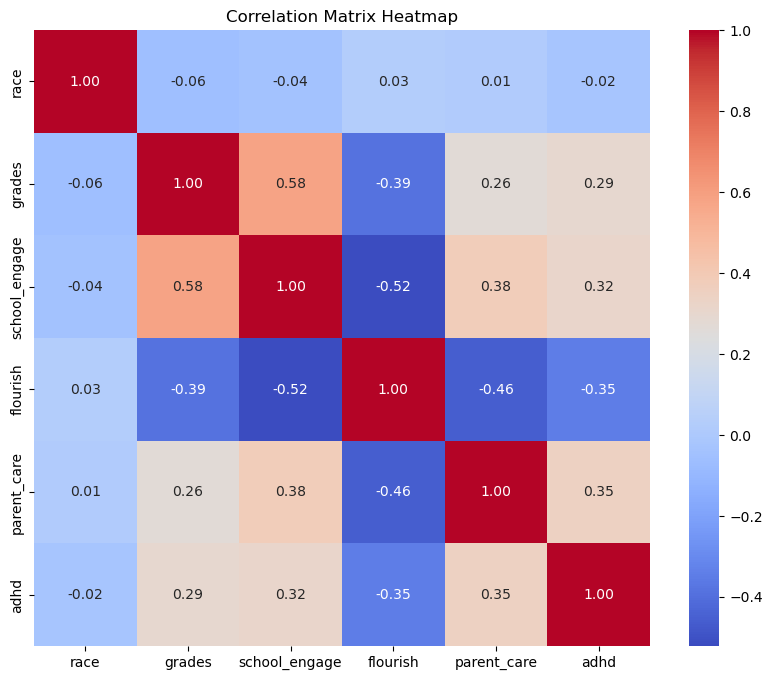

In [563]:

correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [564]:
X = df_hispanic[['grades', 'school_engage', 'flourish', 'parent_care']]
y = df_hispanic['adhd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.40476190476190477
Recall: 0.1827956989247312
Accuracy: 0.8877777777777778


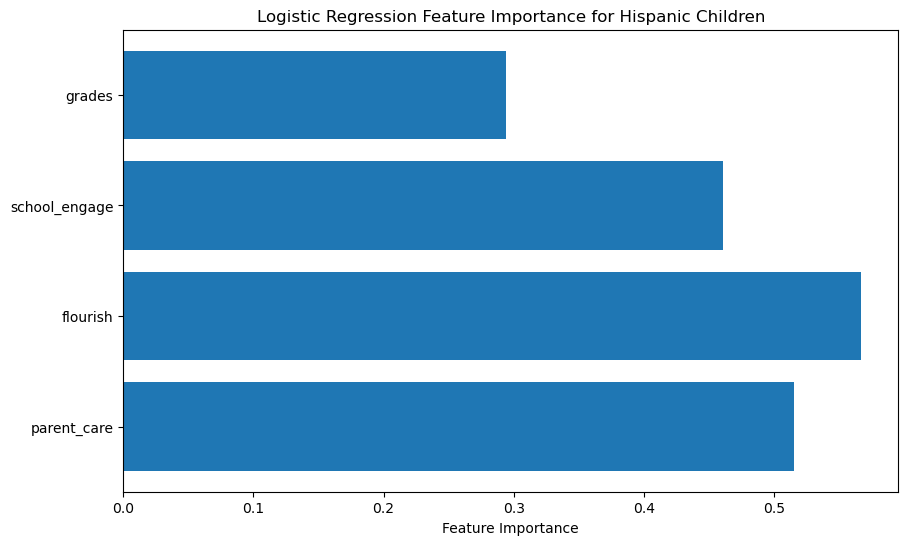

In [565]:
categorical_feature_importance = np.abs(model.coef_)

plt.figure(figsize=(10, 6))
plt.barh(range(len(categorical_feature_importance[0])), categorical_feature_importance[0], align='center')
plt.yticks(np.arange(len(categorical_feature_importance[0])), X)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance for Hispanic Children')
plt.gca().invert_yaxis()  
plt.show()

In [566]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       807
         1.0       0.40      0.18      0.25        93

    accuracy                           0.89       900
   macro avg       0.66      0.58      0.60       900
weighted avg       0.86      0.89      0.87       900



In [567]:
print(confusion_matrix(y_test, y_pred))

[[782  25]
 [ 76  17]]


In [568]:
X = df_black[['grades', 'school_engage', 'flourish', 'parent_care']]
y = df_black['adhd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.391304347826087
Recall: 0.25
Accuracy: 0.8940568475452196


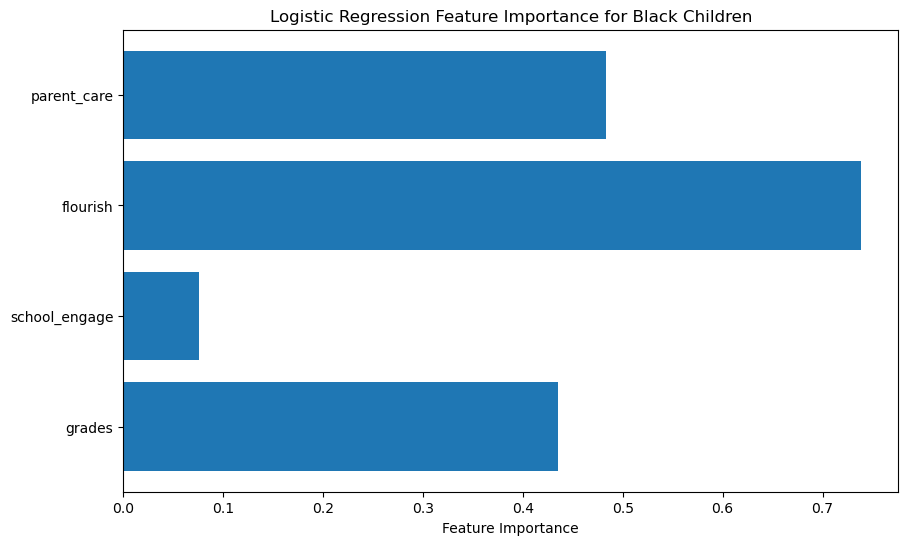

In [569]:
categorical_feature_importance = np.abs(model.coef_)

plt.figure(figsize=(10, 6))
plt.barh(range(len(categorical_feature_importance[0])), categorical_feature_importance[0], align='center')
plt.yticks(np.arange(len(categorical_feature_importance[0])), X)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance for Black Children')
plt.show()

In [570]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       351
         1.0       0.39      0.25      0.31        36

    accuracy                           0.89       387
   macro avg       0.66      0.61      0.62       387
weighted avg       0.88      0.89      0.88       387



In [571]:
print(confusion_matrix(y_test, y_pred))

[[337  14]
 [ 27   9]]


In [572]:
X = df_white[['grades', 'school_engage', 'flourish', 'parent_care']]
y = df_white['adhd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

model = LogisticRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.6538461538461539
Recall: 0.3695652173913043
Accuracy: 0.896457765667575


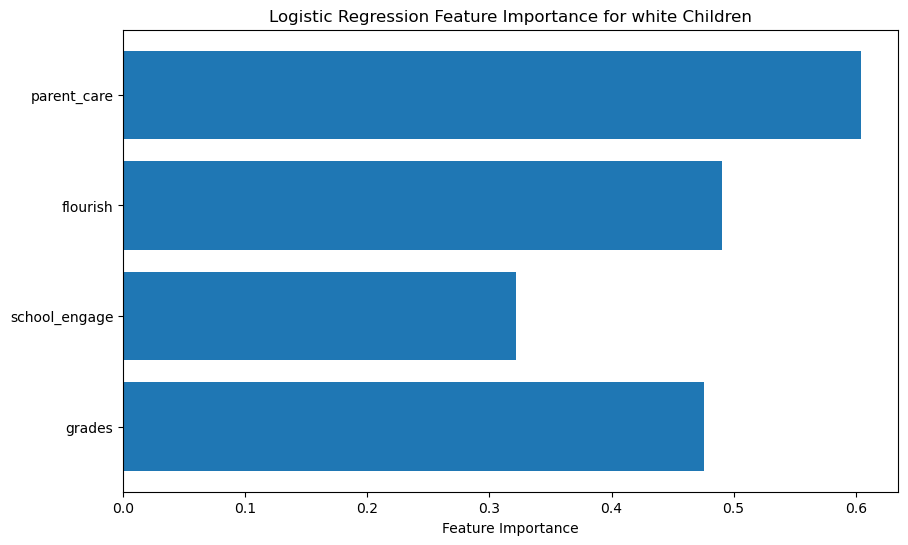

In [573]:
categorical_feature_importance = np.abs(model.coef_)

plt.figure(figsize=(10, 6))
plt.barh(range(len(categorical_feature_importance[0])), categorical_feature_importance[0], align='center')
plt.yticks(np.arange(len(categorical_feature_importance[0])), X)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance for white Children')
plt.show()

In [574]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       321
         1.0       0.65      0.37      0.47        46

    accuracy                           0.90       367
   macro avg       0.78      0.67      0.71       367
weighted avg       0.88      0.90      0.88       367



In [575]:
print(confusion_matrix(y_test, y_pred))

[[312   9]
 [ 29  17]]


In [576]:
X = df2[['grades', 'school_engage', 'flourish', 'parent_care']]
y = df2['adhd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()



model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.570694087403599
Recall: 0.2723926380368098
Accuracy: 0.8676880222841226


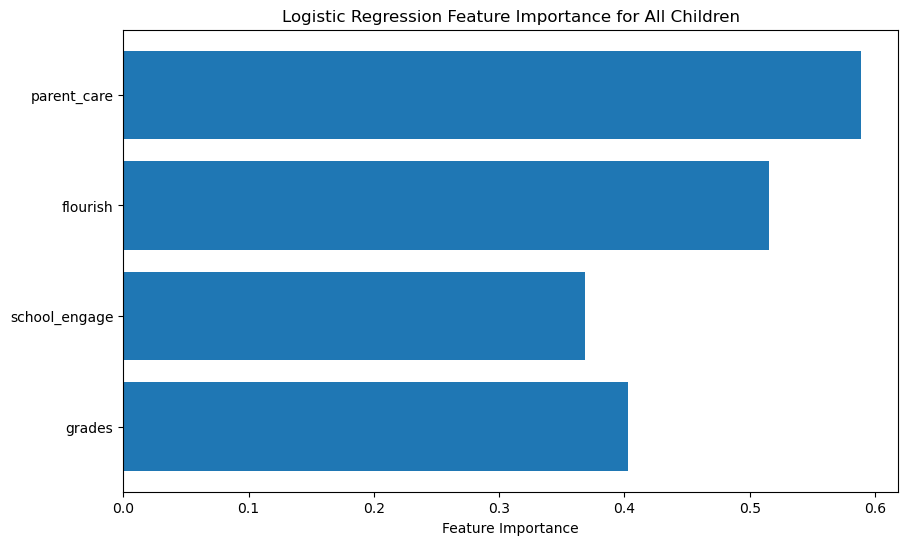

In [577]:
categorical_feature_importance = np.abs(model.coef_)

plt.figure(figsize=(10, 6))
plt.barh(range(len(categorical_feature_importance[0])), categorical_feature_importance[0], align='center')
plt.yticks(np.arange(len(categorical_feature_importance[0])), X)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance for All Children')
plt.show()

In [578]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      4929
         1.0       0.57      0.27      0.37       815

    accuracy                           0.87      5744
   macro avg       0.73      0.62      0.65      5744
weighted avg       0.84      0.87      0.85      5744



In [579]:
print(confusion_matrix(y_test, y_pred))

[[4762  167]
 [ 593  222]]
